In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1 

## 1. Loading the image and dividing in three channels 

In [2]:
im = Image.open('data/IMG_1878.JPG')

In [3]:
X_R = im.getchannel(0)

In [4]:
X_G = im.getchannel(1)

In [5]:
X_B = im.getchannel(2)

## 2.  Collecting random blocks from each channel

In [6]:
X_R = np.array(X_R)
X_R.shape
random_number = np.random.randint(0,X_R.shape[0]-8)
X_R_first_patch = X_R[random_number:random_number+8,:]
random_number = np.random.randint(0,X_R.shape[0]-8)
X_R_second_patch = X_R[random_number:random_number+8,:]
random_number = np.random.randint(0,X_R.shape[0]-8)
X_R_third_patch = X_R[random_number:random_number+8,:]

In [7]:
X_G = np.array(X_G)
X_G.shape
random_number = np.random.randint(0,X_G.shape[0]-8)
X_G_first_patch = X_G[random_number:random_number+8,:]
random_number = np.random.randint(0,X_G.shape[0]-8)
X_G_second_patch = X_G[random_number:random_number+8,:]
random_number = np.random.randint(0,X_G.shape[0]-8)
X_G_third_patch = X_G[random_number:random_number+8,:]

In [8]:
X_B = np.array(X_B)
X_B.shape
random_number = np.random.randint(0,X_B.shape[0]-8)
X_B_first_patch = X_B[random_number:random_number+8,:]
random_number = np.random.randint(0,X_B.shape[0]-8)
X_B_second_patch = X_B[random_number:random_number+8,:]
random_number = np.random.randint(0,X_B.shape[0]-8)
X_B_third_patch = X_B[random_number:random_number+8,:]

In [9]:
R = np.hstack((X_R_first_patch,X_R_second_patch,X_R_third_patch,
          X_G_first_patch,X_G_second_patch,X_G_third_patch,
          X_B_first_patch,X_B_second_patch,X_B_third_patch))

In [10]:
R.shape

(8, 6912)

## 3. Subtracting the mean  

In [11]:
mean_vector = np.mean(R,axis=1)

In [12]:
mean = mean_vector.reshape((8,1))

In [13]:
Removed_mean_R = R - mean

## 4. Calculating covariance matrix 

In [14]:
R_cov = np.cov(Removed_mean_R)

In [15]:
R_cov.shape

(8, 8)

## 5. Eigendecomposition 

In [16]:
eigenvalues,eigenvector = np.linalg.eig(R_cov)

In [17]:
eigenvalues

array([21624.36767143,   732.13427204,   356.66375618,   242.6092523 ,
         186.67372565,   123.55862789,    37.99553962,    71.09735725])

In [19]:
np.dot(eigenvector.T,R).shape

(8, 6912)

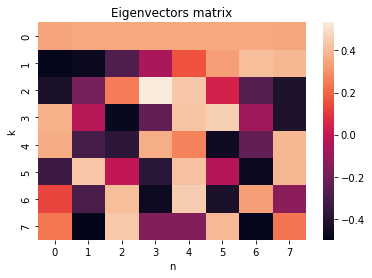

In [20]:
sns.heatmap(eigenvector.T)
plt.xlabel('n')
plt.ylabel('k')
plt.title('Eigenvectors matrix')
plt.show()

Here, we can see that the eigenvector trends are not similar to the one given in slides and pattern is not consistent.

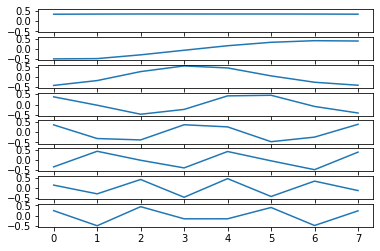

In [21]:
fig, axs = plt.subplots(8, sharex=True, sharey=True)
axs[0].plot(eigenvector.T[0])
axs[1].plot(eigenvector.T[1])
axs[2].plot(eigenvector.T[2])
axs[3].plot(eigenvector.T[3])
axs[4].plot(eigenvector.T[4])
axs[5].plot(eigenvector.T[5])
axs[6].plot(eigenvector.T[6])
axs[7].plot(eigenvector.T[7])

## 6. Increasing number of blocks

In [22]:
X_R_30 = X_R_first_patch
for i in range(29):    
    random_number = np.random.randint(0,X_R.shape[0]-8)
    X_R_30 = np.hstack((X_R_30,X_R[random_number:random_number+8,:]))

In [23]:
X_G_30 = X_G_first_patch
for i in range(29):    
    random_number = np.random.randint(0,X_G.shape[0]-8)
    X_G_30 = np.hstack((X_G_30,X_G[random_number:random_number+8,:]))

In [24]:
X_B_30 = X_B_first_patch
for i in range(29):    
    random_number = np.random.randint(0,X_B.shape[0]-8)
    X_B_30 = np.hstack((X_B_30,X_B[random_number:random_number+8,:]))

In [25]:
R = np.hstack((X_R_30,X_G_30,X_B_30))

In [26]:
R.shape

(8, 69120)

In [27]:
mean_vector = np.mean(R,axis=1)

In [28]:
mean = mean_vector.reshape((8,1))

In [29]:
Removed_mean_R = R - mean

In [30]:
R_cov = np.cov(Removed_mean_R)

In [31]:
R_cov.shape

(8, 8)

In [32]:
eigenvalues,eigenvector = np.linalg.eig(R_cov)

In [33]:
np.dot(eigenvector.T,R).shape

(8, 69120)

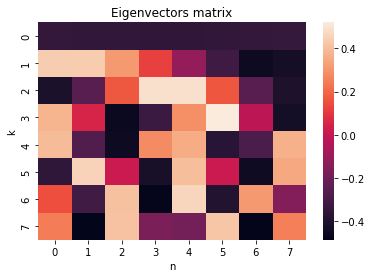

In [34]:
sns.heatmap(eigenvector.T)
plt.xlabel('n')
plt.ylabel('k')
plt.title('Eigenvectors matrix')
plt.show()

Here, we can see that the eigenvector trends are kinda similar to the one given in slides and patterns are line plot drawn below resambles the one given in slide.

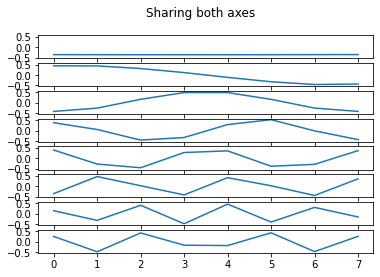

In [35]:
fig, axs = plt.subplots(8, sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(eigenvector.T[0])
axs[1].plot(eigenvector.T[1])
axs[2].plot(eigenvector.T[2])
axs[3].plot(eigenvector.T[3])
axs[4].plot(eigenvector.T[4])
axs[5].plot(eigenvector.T[5])
axs[6].plot(eigenvector.T[6])
axs[7].plot(eigenvector.T[7])

# Question 2 

In [2]:
from scipy.io import wavfile

## 1. Loading four sound files 

In [3]:
samplerate_1, data_1 = wavfile.read('data/x_ica_1.wav')

In [4]:
samplerate_2, data_2 = wavfile.read('data/x_ica_2.wav')

In [5]:
samplerate_3, data_3 = wavfile.read('data/x_ica_3.wav')

In [6]:
samplerate_4, data_4 = wavfile.read('data/x_ica_4.wav')

In [7]:
import IPython

## 2. 

In [8]:
IPython.display.Audio(data_1,rate=samplerate_1)

In [9]:
IPython.display.Audio(data_2,rate=samplerate_2)

In [10]:
IPython.display.Audio(data_3,rate=samplerate_3)

In [11]:
IPython.display.Audio(data_4,rate=samplerate_4)

In [12]:
Y = np.vstack((data_1,data_2,data_3,data_4))

In [13]:
Y.shape

(4, 42292)

## 3. , 4. Whitening the data and implementing ICA 

In [14]:
def whiten(Y):
    mean_vector = np.mean(Y,axis=1)
    mean = mean_vector.reshape((Y.shape[0],1))
    Removed_mean_Y = Y - mean
    Y_cov = np.cov(Removed_mean_Y)
    eigenvalues,eigenvector = np.linalg.eig(Y_cov)
    diagonal = np.diag(1.0/np.sqrt(eigenvalues))
    Z = np.dot(np.dot(diagonal,eigenvector.T),Y)
    return Z

In [15]:
temp = whiten(Y)

In [16]:
np.round(np.cov(temp))

array([[ 1.,  0., -0., -0.],
       [ 0.,  1.,  0.,  0.],
       [-0.,  0.,  1., -0.],
       [-0.,  0., -0.,  1.]])

Here, the whitten data's covariance should be an identity matrix and we can infer that is the case above

ICA: 
$$ \Delta{W} \leftarrow (NI - g(Y)f(Y)^{T}) W \tag{1} $$
$$ W \leftarrow W + p \Delta{W} \tag{2} $$
$$ Y \leftarrow WZ \tag{3} $$

Repeating Equation 1,2 and 3 till we get small enough $\Delta{W}$ value

In [17]:
W = np.random.rand(4,4)
w_delta_check = np.random.rand(4,4)

In [18]:
Y_t = np.random.rand(Y.shape[0],Y.shape[1])

In [19]:
for _ in range(10000):
    N = len(data_1)
    learning_rate = 0.000001
    I = np.identity(4)
    G_Y = np.tanh(Y_t)
    f_Y = np.power(Y_t,3)
    w_delta = np.dot((N * I - np.dot(G_Y,f_Y.T)),W)
    if abs(np.sum(w_delta[0])/len(w_delta[0])) < 1e-12:
        print("w_delta",w_delta)
        break
    W = W + learning_rate * w_delta
    Y_t = np.dot(W,whiten(Y))

w_delta [[ 5.46346621e-11  7.27433875e-12 -4.87432219e-11 -1.07405713e-11]
 [-1.17024176e-10 -6.63412487e-10  2.28583023e-10  2.81440429e-10]
 [-1.32166655e-09  1.56506460e-10  2.35686417e-11 -7.28280783e-11]
 [-1.60722209e-10  8.02278274e-11 -1.37608593e-11 -3.27771889e-11]]


## 5. Separated signals and their transcription 

In [20]:
Y_t

array([[ 1.73829867e-02,  1.70366581e-02, -5.26823343e-03, ...,
        -3.56757382e-02, -3.10747426e-02, -5.32242645e-02],
       [ 5.10702574e-01,  7.80732975e-01,  5.92750531e-01, ...,
        -1.38456991e+00, -1.50265397e+00, -1.54755800e+00],
       [-9.57199517e-03, -1.26686069e-03,  1.51790708e-02, ...,
         1.42428245e-02,  1.44410155e-02,  3.77700015e-02],
       [ 2.13629055e-02, -6.17333096e-03, -2.83398956e-02, ...,
        -4.27755762e-03,  5.56585582e-03, -3.57798683e-02]])

In [22]:
IPython.display.Audio(Y_t[0],rate=16000,normalize=True)

In [23]:
IPython.display.Audio(Y_t[1],rate=16000,normalize=True)

In [24]:
IPython.display.Audio(Y_t[2],rate=16000,normalize=True)

In [25]:
IPython.display.Audio(Y_t[3],rate=16000,normalize=True)

Here, the order can be different so I am just transcribing the separate signals<br>
1: "It's not easy to create illuminating samples" - Though the voice is clear, I don't know what he is saying at the end<br>
2: "Twenty two or Twenty three"<br>
3: "I ate every oyster on noah's place" - Separation is clear but I don't know what she says at the end<br>
4: "bruuuuuuuuuuuuuuuuuuuuuuuuddddduuuuuuuuuuuuuuuuuuuuuuumm" - Noise

# Question 3 

## 1. Reading signals and applying STFT 

In [60]:
import librosa

In [61]:
ocean,ocean_learningrate = librosa.load('data/ocean.wav',sr=16000)

In [62]:
ocean.shape

(80000,)

In [63]:
piano,piano_learningrate = librosa.load('data/piano.wav',sr=16000)

In [64]:
piano.shape

(80000,)

In [65]:
IPython.display.Audio(ocean,rate=16000,normalize=True)

In [66]:
IPython.display.Audio(piano,rate=16000,normalize=True)

In [67]:
S = librosa.stft(piano.astype('float'),n_fft=1024,hop_length=512)

In [68]:
S.shape

(513, 157)

In [69]:
N = librosa.stft(ocean.astype('float'),n_fft=1024,hop_length=512)

In [70]:
N.shape

(513, 157)

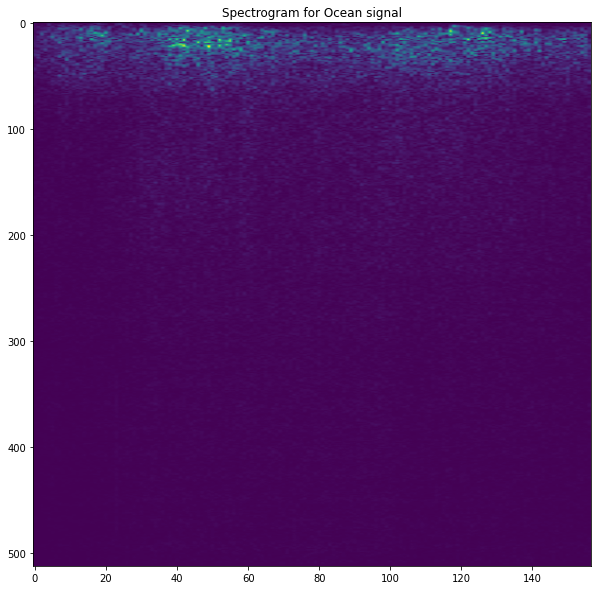

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(abs(N),aspect='auto')
plt.title('Spectrogram for Ocean signal')
plt.show()

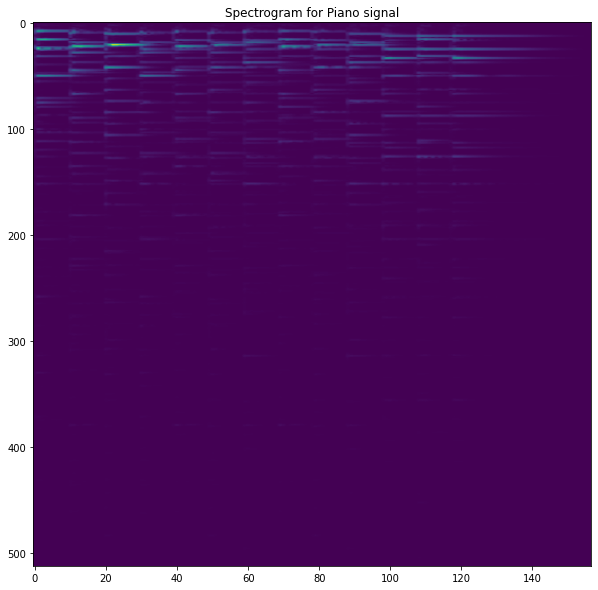

In [72]:
plt.figure(figsize=(10,10))
plt.imshow(abs(S),aspect='auto')
plt.title('Spectrogram for Piano signal')
plt.show()

## 2. Adding two spectrograms

In [73]:
X = np.add(S,N)

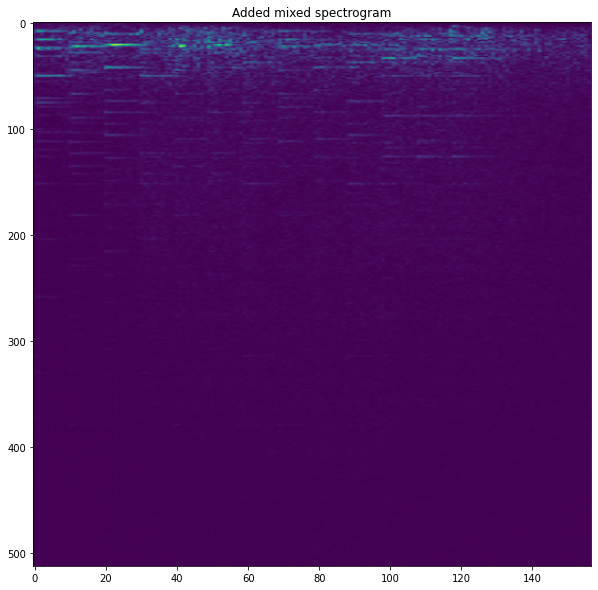

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(abs(X),aspect='auto')
plt.title('Added mixed spectrogram')
plt.show()

## 3. Hadamard 

In [75]:
M = np.divide(S,np.add(S,N))

## 4. Getting the original source back 

In [76]:
M_dash = abs(S)**2/(abs(S)**2+abs(N)**2)

In [77]:
S_recovered = M_dash * X

In [78]:
S_recovered.shape

(513, 157)

Converting it back to time series

In [79]:
piano_recovered = librosa.istft(S_recovered,n_fft=1024,hop_length=512)

In [80]:
IPython.display.Audio(piano_recovered[:len(piano)],rate=piano_learningrate)

## 5. Signal-to-noise Ratio 

In [81]:
SNR = 10 * np.log10(np.sum(piano[:len(piano_recovered)]**2)/(np.sum((piano[:len(piano_recovered)]-piano_recovered)**2)))

In [82]:
print('The SNR value is :',SNR)

The SNR value is : 8.11602804010499


Here, the SNR ratio is positive which suggests that the signal power is greater than the noise power.

## 6. Ideal Binary Mask 

In [83]:
S.shape

(513, 157)

In [84]:
B = []
for i in range(S.shape[0]):
    temp = [1 if abs(S[i,j])>abs(N[i,j]) else 0 for j in range(S.shape[1])]
    B.append(temp)

In [85]:
B = np.array(B)

In [86]:
S_IBM_recovered = B * X

In [87]:
piano_recovered_ibm = librosa.istft(S_IBM_recovered,n_fft=1024,hop_length=512)

In [88]:
piano_recovered_ibm.shape

(79872,)

In [89]:
IPython.display.Audio(piano_recovered_ibm[:len(piano)],rate=16000,normalize=True)

In [90]:
piano_recovered_ibm = piano_recovered_ibm[:len(piano)]

In [91]:
SNR = 10 * np.log10(np.sum(piano[:len(piano_recovered)]**2)/(np.sum((piano[:len(piano_recovered)]-piano_recovered_ibm)**2)))

In [92]:
print('The SNR value is :',SNR)

The SNR value is : 7.374315224192655


Here, the SNR ratio is positive which suggests that the signal power is greater than the noise power.